In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.gofplots import qqplot_2samples
from sklearn.utils import resample
%matplotlib inline

In [58]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
raw_data.head(10)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
5,CH,36.0,6,4.0,6.0,7.0,3.0,8.0,7.0,4.0,2.0,NaN,2.0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0


In [59]:
raw_data['cntry'].value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [60]:
raw_data['year'].value_counts()

7    4297
6    4297
Name: year, dtype: int64

Types of distributions and when they are used in modeling:<br>
1) Normal or Gaussian

2) Poisson
Poisson is popular for modelling the number of times an event occurs in an interval of time or space.

3) Binomial
the probability distribution of a random variable which takes the value 1 with probability {\displaystyle p} p and the value 0 with probability {\displaystyle q=1-p} q=1-p — i.e., the probability distribution of any single experiment that asks a yes–no question


## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

People Trust is measured on a scale of 0 - 10 with 1 being not trusting and 10 being very trustful.

['CH', 'DE', 'NO', 'SE', 'ES', 'CZ']

 CH


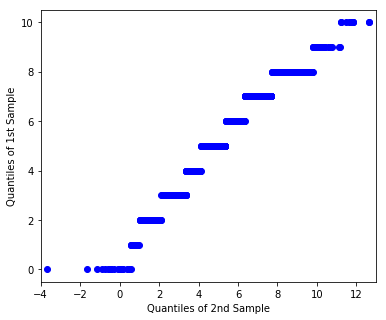

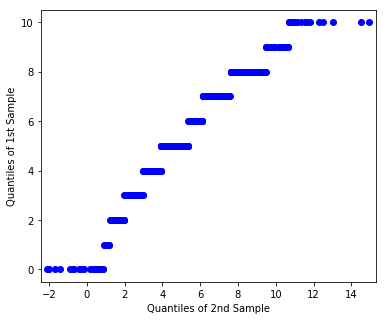

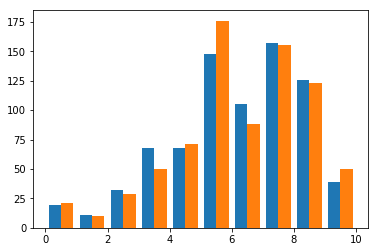


 DE


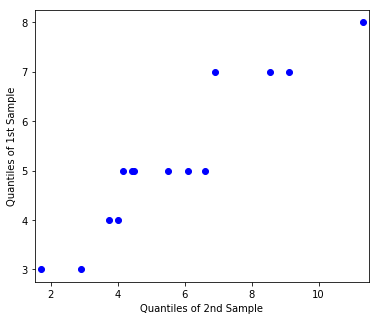

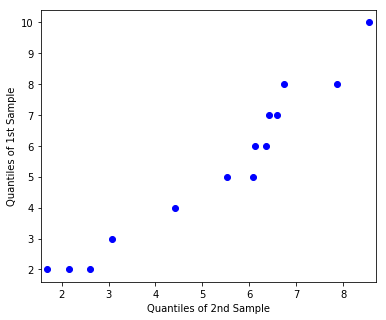

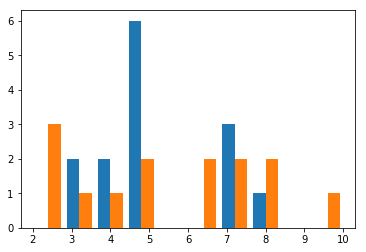


 NO


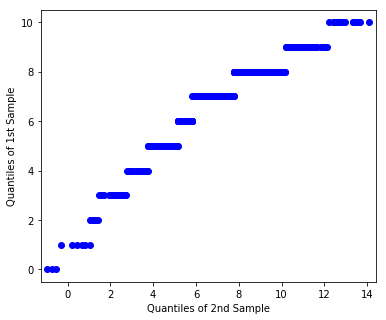

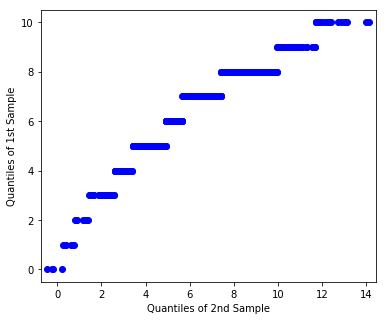

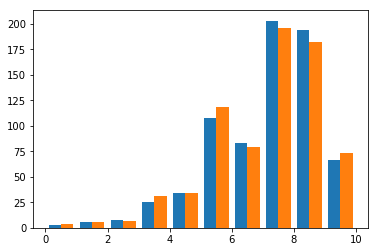


 SE


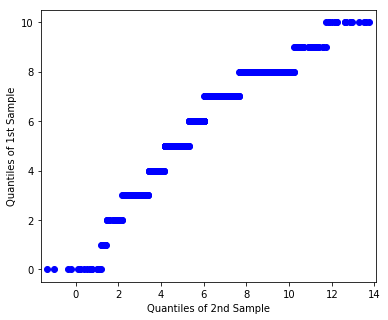

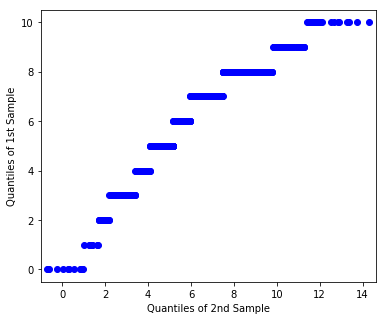

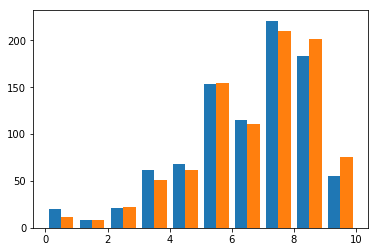


 ES


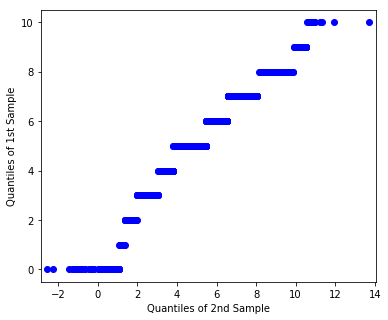

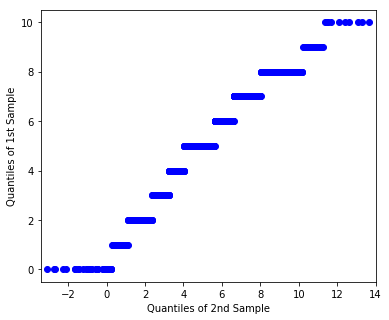

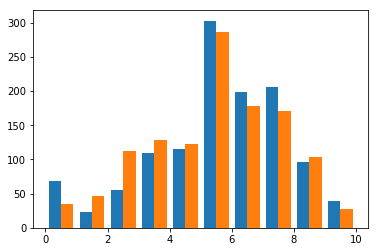


 CZ


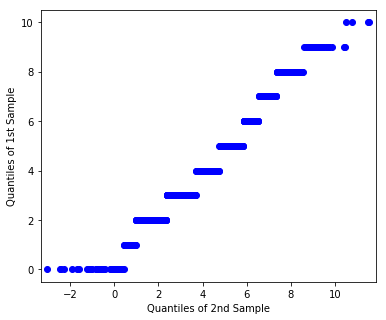

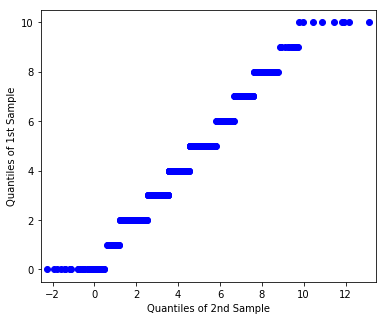

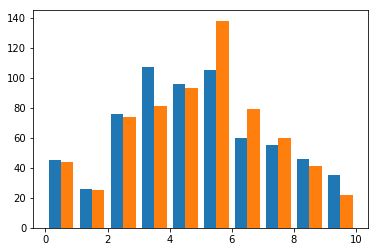

In [61]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
country_list = list(set(raw_data.cntry))
print(country_list)
def plotter_tester(country, measure):
    print('\n', country)
    temp_country = raw_data[raw_data.cntry == country]
    data_2012 = temp_country[temp_country.year == 6]
    data_2014 = temp_country[temp_country.year == 7]
    X = data_2012[measure].dropna(axis=0)
    y = data_2014[measure].dropna(axis=0)
    
    # Create a random normal distribution to compare with our data in a QQ Plot
    x_norm = np.random.normal(loc=np.mean(X), scale=2.5, size=len(X))
    y_norm = np.random.normal(loc=np.mean(y), scale=2.5, size=len(y))
    pp_x = ProbPlot(X)
    pp_x_norm = ProbPlot(x_norm)
    pp_y = ProbPlot(y)
    pp_y_norm = ProbPlot(y_norm)
    
    # Plot it in a QQ Plot
    N, M = 6, 5
    fig, ax = plt.subplots(figsize=(N, M))
    qqplot_2samples(pp_x, pp_x_norm, ax=ax)
    plt.show()
    
    N, M = 6, 5
    fig, ax = plt.subplots(figsize=(N, M))    
    qqplot_2samples(pp_y, pp_y_norm, ax=ax)
    plt.show()
    
    #Plot them in a Histogram
    plt.hist([X,y], bins=10)
    plt.show()

for x in country_list:
    plotter_tester(x, 'ppltrst')

The following countries had normal distributions: ES and CZ <br>
Since this question has a dependency (if there is no data for 2012, then the data in 2014 is worthless for measuring whether they became less trustful).

In [62]:
normal_cntry = ['ES', 'CZ']
not_normal = ['NO', 'DE', 'CH', 'SE']
for country in normal_cntry:
    print('\n', country)
    temp_country = raw_data[raw_data.cntry == country]
    data_2012 = temp_country[temp_country.year == 6]
    data_2014 = temp_country[temp_country.year == 7]
    X = data_2012['ppltrst'].dropna(axis=0)
    y = data_2014['ppltrst'].dropna(axis=0)
    print(stats.ttest_rel(data_2012.ppltrst, data_2014.ppltrst, nan_policy='omit'))
    
for country in not_normal:
    print('\n', country)
    temp_country = raw_data[raw_data.cntry == country]
    data_2012 = temp_country[temp_country.year == 6]
    data_2014 = temp_country[temp_country.year == 7]
    X = data_2012['ppltrst'].dropna(axis=0)
    y = data_2014['ppltrst'].dropna(axis=0)
    print(stats.wilcoxon(data_2012.ppltrst, data_2014.ppltrst))


 ES
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320284)

 CZ
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)

 NO
WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

 DE
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

 CH
WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

 SE
WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


/Users/bryancorder/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Users/bryancorder/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


ES and SE are the only countries with results significant enough to assume that the people in both countries became more trusting in 2014.

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Happiness is measured on a scale of 0 through 10 with 0 being unhappy and 10 being happy.


 CH


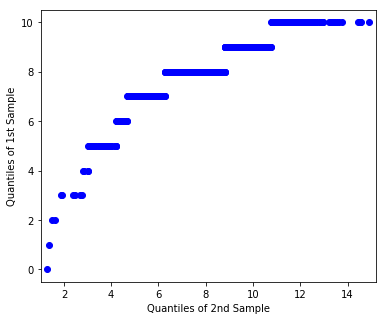

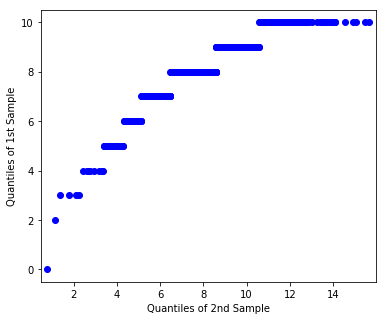

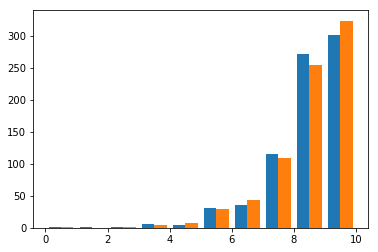


 DE


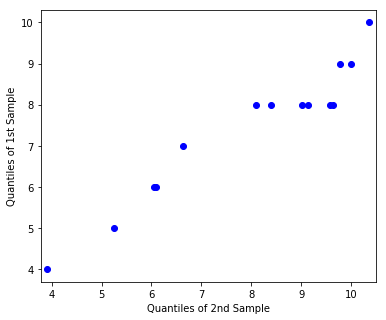

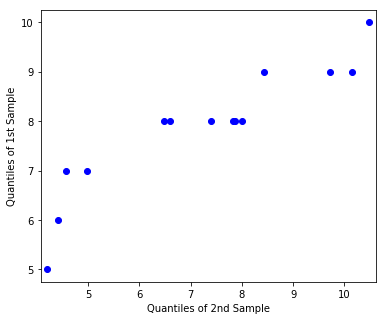

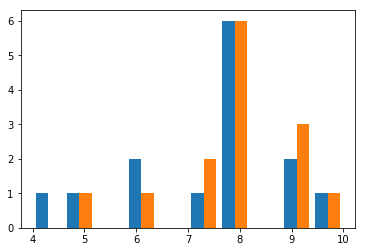


 NO


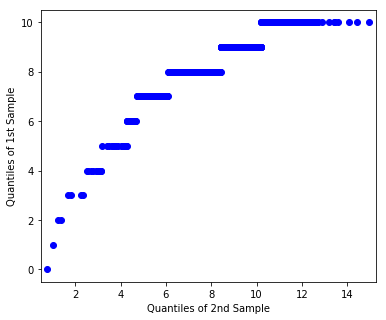

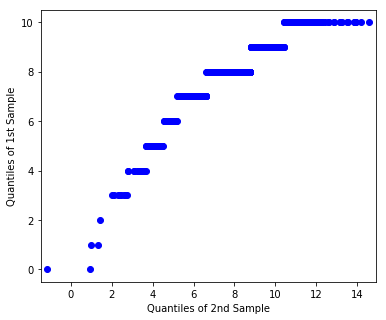

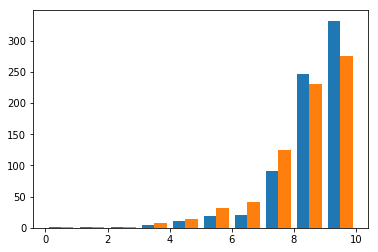


 SE


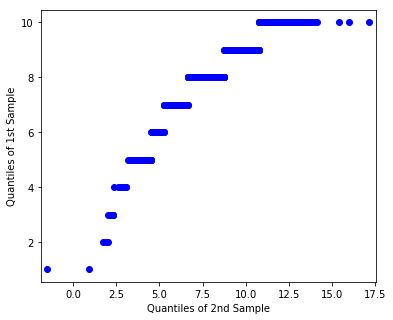

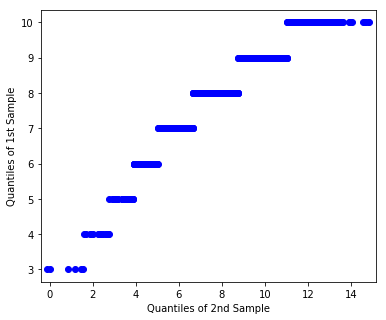

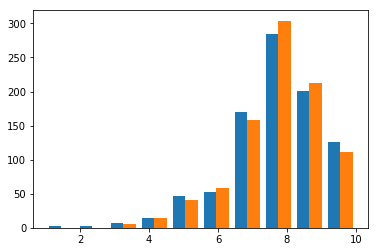


 ES


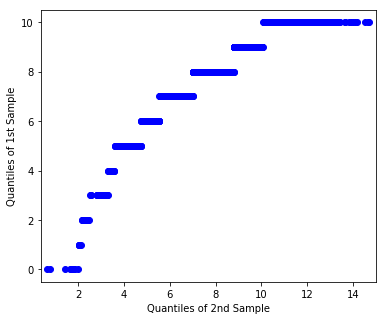

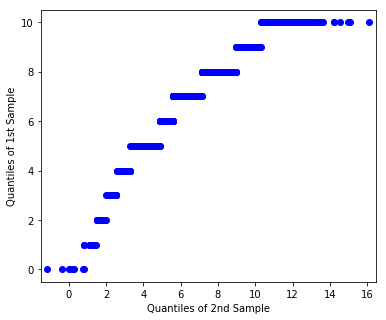

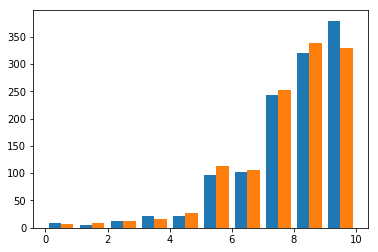


 CZ


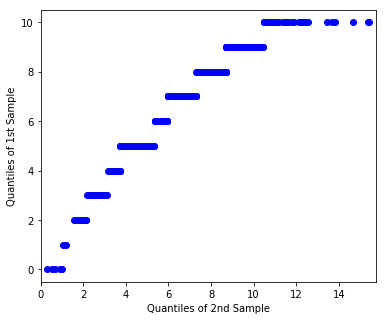

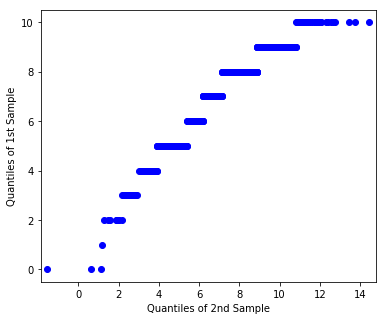

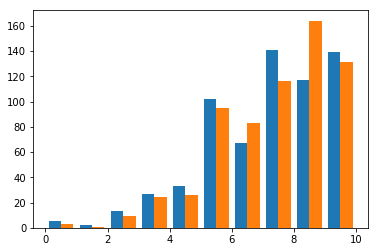

In [63]:
for x in country_list:
    plotter_tester(x, 'happy')

In [64]:
for country in country_list:
    print('\n', country)
    temp_country = raw_data[raw_data.cntry == country]
    data_2012 = temp_country[temp_country.year == 6]
    data_2014 = temp_country[temp_country.year == 7]
    X = data_2012['happy'].dropna(axis=0)
    y = data_2014['happy'].dropna(axis=0)
    print(stats.wilcoxon(data_2012.happy, data_2014.happy))


 CH
WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

 DE
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

 NO
WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

 SE
WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)

 ES
WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

 CZ
WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)


/Users/bryancorder/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Users/bryancorder/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


CZ and NO are the only countries with a result with any significance and it says that they have become happier in 2014.

## 3. Who reported watching more TV in 2012, men or women?
		
0 = No time at all <br>
1 = Less than 0,5 hour <br>
2 = 0,5 hour to 1 hour <br>
3 = More than 1 hour, up to 1,5 hours <br>
4 = More than 1,5 hours, up to 2 hours <br>
5 = More than 2 hours, up to 2,5 hours <br>
6 = More than 2,5 hours, up to 3 hours<br>
7 = More than 3 hours

In [65]:
def two_variable_plotter(X,y):
    # Create a random normal distribution to compare with our data in a QQ Plot
    x_norm = np.random.normal(loc=np.mean(X), scale=2.5, size=len(X))
    y_norm = np.random.normal(loc=np.mean(y), scale=2.5, size=len(y))
    pp_x = ProbPlot(X)
    pp_x_norm = ProbPlot(x_norm)
    pp_y = ProbPlot(y)
    pp_y_norm = ProbPlot(y_norm)
    
    # Plot it in a QQ Plot
    N, M = 6, 5
    fig, ax = plt.subplots(figsize=(N, M))
    qqplot_2samples(pp_x, pp_x_norm, ax=ax)
    plt.show()
    
    N, M = 6, 5
    fig, ax = plt.subplots(figsize=(N, M))    
    qqplot_2samples(pp_y, pp_y_norm, ax=ax)
    plt.show()
    
    #Plot them in a Histogram
    plt.hist([X,y], bins=10)
    plt.show()

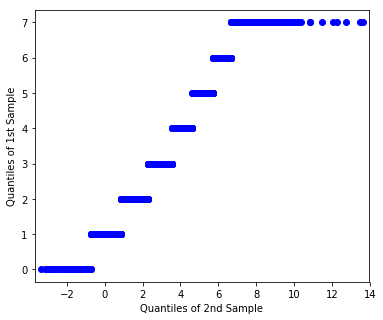

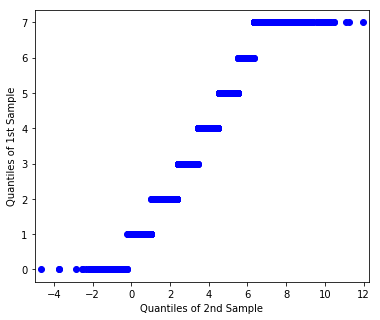

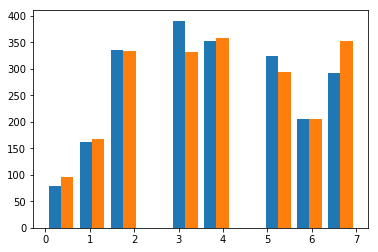

Ttest_indResult(statistic=-0.9521939408222541, pvalue=0.34105240236128953)

In [66]:
data_2012 = raw_data[raw_data.year == 6]
men = data_2012[data_2012.gndr == 1]
men = resample(men, n_samples=2143)
women = data_2012[data_2012.gndr == 2]
X = men.tvtot.dropna(axis=0)
y = women.tvtot.dropna(axis=0)

two_variable_plotter(X,y)

stats.ttest_ind(X, y)

The results show there is no real significant difference between the two populations.

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

		
0 = Most people try to take advantage of me <br>
10 = Most people try to be fair

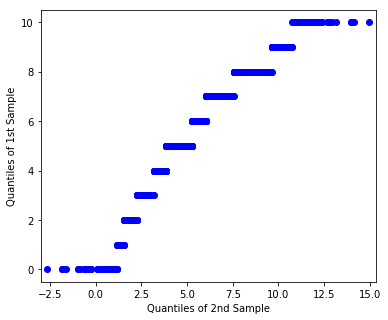

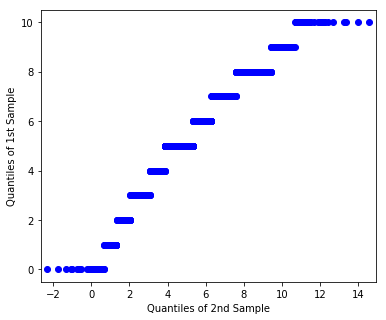

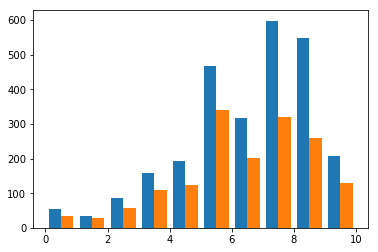

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)

In [67]:
partner = data_2012[data_2012.partner == 1]
no_partner = data_2012[data_2012.partner == 2]
X = partner.pplfair.dropna(axis=0)
y = no_partner.pplfair.dropna(axis=0)

two_variable_plotter(X,y)

stats.ttest_ind(partner.pplfair, no_partner.pplfair, nan_policy='omit')

People with a partner consider themselves safer and the results have significance.

## 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

		
1 = Never
2 = Less than once a month
3 = Once a month
4 = Several times a month
5 = Once a week
6 = Several times a week
7 = Every day

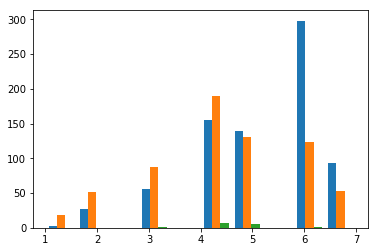

For Switzerland, Czech and Germany: (88.95857134504449, 4.818275998198674e-20, 5.0, array([[391, 177,   1],
       [381, 478,  13]]))


In [68]:
countries = ['CH', 'CZ', 'DE']
data_2014 = raw_data[raw_data.year == 7]
CH = data_2014[data_2014.cntry == 'CH']
CZ = data_2014[data_2014.cntry == 'CZ']
DE = data_2014[data_2014.cntry == 'DE']
X = CH.sclmeet.dropna(axis=0)
y = CZ.sclmeet.dropna(axis=0)
z = DE.sclmeet.dropna(axis=0)
plt.hist([X,y,z], bins=10)
plt.show()
print('For Switzerland, Czech and Germany:', stats.median_test(X, y, z))

In [69]:
stats.kruskal(
    CH.sclmeet.dropna(axis=0),
    CZ.sclmeet.dropna(axis=0),
    DE.sclmeet.dropna(axis=0))

KruskalResult(statistic=90.64258320601328, pvalue=2.075932098411105e-20)

In [70]:
print('For Switzerland & Czech:', stats.ttest_ind(X,y))
print('For Czech & Germany:', stats.ttest_ind(y,z))
print('For Switzerland & Germany:', stats.ttest_ind(X,z))

For Switzerland & Czech: Ttest_indResult(statistic=9.675850699914886, pvalue=1.7204743885392493e-21)
For Czech & Germany: Ttest_indResult(statistic=0.0433661445611368, pvalue=0.9654226437207307)
For Switzerland & Germany: Ttest_indResult(statistic=2.0861293215128325, pvalue=0.037289604714147245)


You can see from the above that Czech and Germany have no real signifiant difference, but Switzerland stands out as one that meets more socially.

## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

1 = Much less than most
2 = Less than most
3 = About the same
4 = More than most
5 = Much more than most

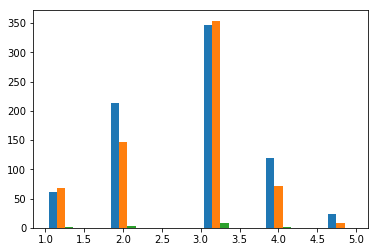

For Switzerland, Czech, and Germany: (11.481719268043303, 0.003212005938595108, 3.0, array([[144,  81,   1],
       [621, 569,  13]]))
For Switzerland & Czech: Ttest_indResult(statistic=1.665721791943212, pvalue=0.09599050025440872)
For Czech & Germany: Ttest_indResult(statistic=-0.04890685579084129, pvalue=0.9610082764822516)
For Switzerland & Germany: Ttest_indResult(statistic=0.2746903478421981, pvalue=0.7836271662948312)


In [71]:
countries = ['CH', 'CZ', 'DE']
data_2014 = raw_data[raw_data.year == 7]
CH = data_2014[data_2014.cntry == 'CH']
CZ = data_2014[data_2014.cntry == 'CZ']
DE = data_2014[data_2014.cntry == 'DE']
X = CH.sclact.dropna(axis=0)
y = CZ.sclact.dropna(axis=0)
z = DE.sclact.dropna(axis=0)
plt.hist([X,y,z], bins=10)
plt.show()
print('For Switzerland, Czech, and Germany:', stats.median_test(X, y, z))
print('For Switzerland & Czech:', stats.ttest_ind(X,y))
print('For Czech & Germany:', stats.ttest_ind(y,z))
print('For Switzerland & Germany:', stats.ttest_ind(X,z))

The results don't really show much of a difference between the 3 countries.